## ⚙️ setup

### 📦 import libs

In [36]:
# General Data Manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Stat Analysis
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy import stats


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dython.nominal import associations
from plotly.subplots import make_subplots

#Handeling Outliers
from datasist.structdata import detect_outliers


# String and regex processing
import re

# ML Libs
from deap import base, creator, tools, algorithms
import random
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder , LabelEncoder ,MinMaxScaler , RobustScaler , StandardScaler 
from sklearn.impute import KNNImputer ,SimpleImputer 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import BinaryEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_validate , train_test_split,cross_val_score , GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , roc_auc_score 
from sklearn.metrics import make_scorer
import warnings
import joblib

### 📟 set-conf

In [2]:
# Display settings
pd.set_option('display.max_columns', 100)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Handling warnings
warnings.simplefilter('ignore')

## 🔎 Data Exploration and cleaning

In [3]:
df = pd.read_csv('../data/Full Data Unemployment Rate in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,M,3.65,11999139.0,43.24,South
1,Andhra Pradesh,30-06-2019,M,3.05,11755881.0,42.05,South
2,Andhra Pradesh,31-07-2019,M,3.75,12086707.0,43.50,South
3,Andhra Pradesh,31-08-2019,M,3.32,12285693.0,43.97,South
4,Andhra Pradesh,30-09-2019,M,5.17,12256762.0,44.68,South


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   1007 non-null   object 
 1   Date                                     1007 non-null   object 
 2   Frequency                                1007 non-null   object 
 3   Estimated Unemployment Rate (%)          1007 non-null   float64
 4   Estimated Employed                       1007 non-null   float64
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Area                                     1007 non-null   object 
dtypes: float64(3), object(4)
memory usage: 55.2+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,1007.000000,1.007000e+03,1007.000000
mean,11.906991,8.996209e+06,42.378620
std,10.739549,1.020784e+07,8.048542
min,0.000000,4.942000e+04,13.330000
25%,4.685000,1.639125e+06,37.835000
50%,8.890000,5.543380e+06,40.880000
75%,16.125000,1.287115e+07,45.315000
max,76.740000,5.943376e+07,72.570000


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Region,1007,28,Andhra Pradesh,38
Date,1007,18,29-02-2020,79
Frequency,1007,1,M,1007
Area,1007,5,South,419


### 📝 Data Quality Mini Report (Summary)

✅ **Strengths**  
- **No missing values or duplicates**.  
- All columns complete and correctly typed.  
- **Latitude (10.85°–33.78°)** and **longitude (71.19°–92.94°)** are **valid** and within India’s geographic bounds.  
- Labor metrics are **plausible** (e.g., high unemployment in 2020 aligns with pandemic lockdowns).  

⚠️ **Minor Notes**  
- `Date` is string—convert to datetime for time-series analysis. 
- Avoid interpreting mean lat/lon as a true geographic center.  

✅ **Verdict**  
**High-quality data—ready for analysis** with minimal preprocessing.

In [8]:
# let's fix Date
df['Date'] = pd.to_datetime(df['Date'])

## 📊 EDA

### 🧮 Univariate Analysis

#### 🔢 Numeric Columns 

##### hsitograms 

In [9]:
# columns list
numric = df.select_dtypes(include = 'number').columns.tolist()

# number on columns 
len(numric)

3

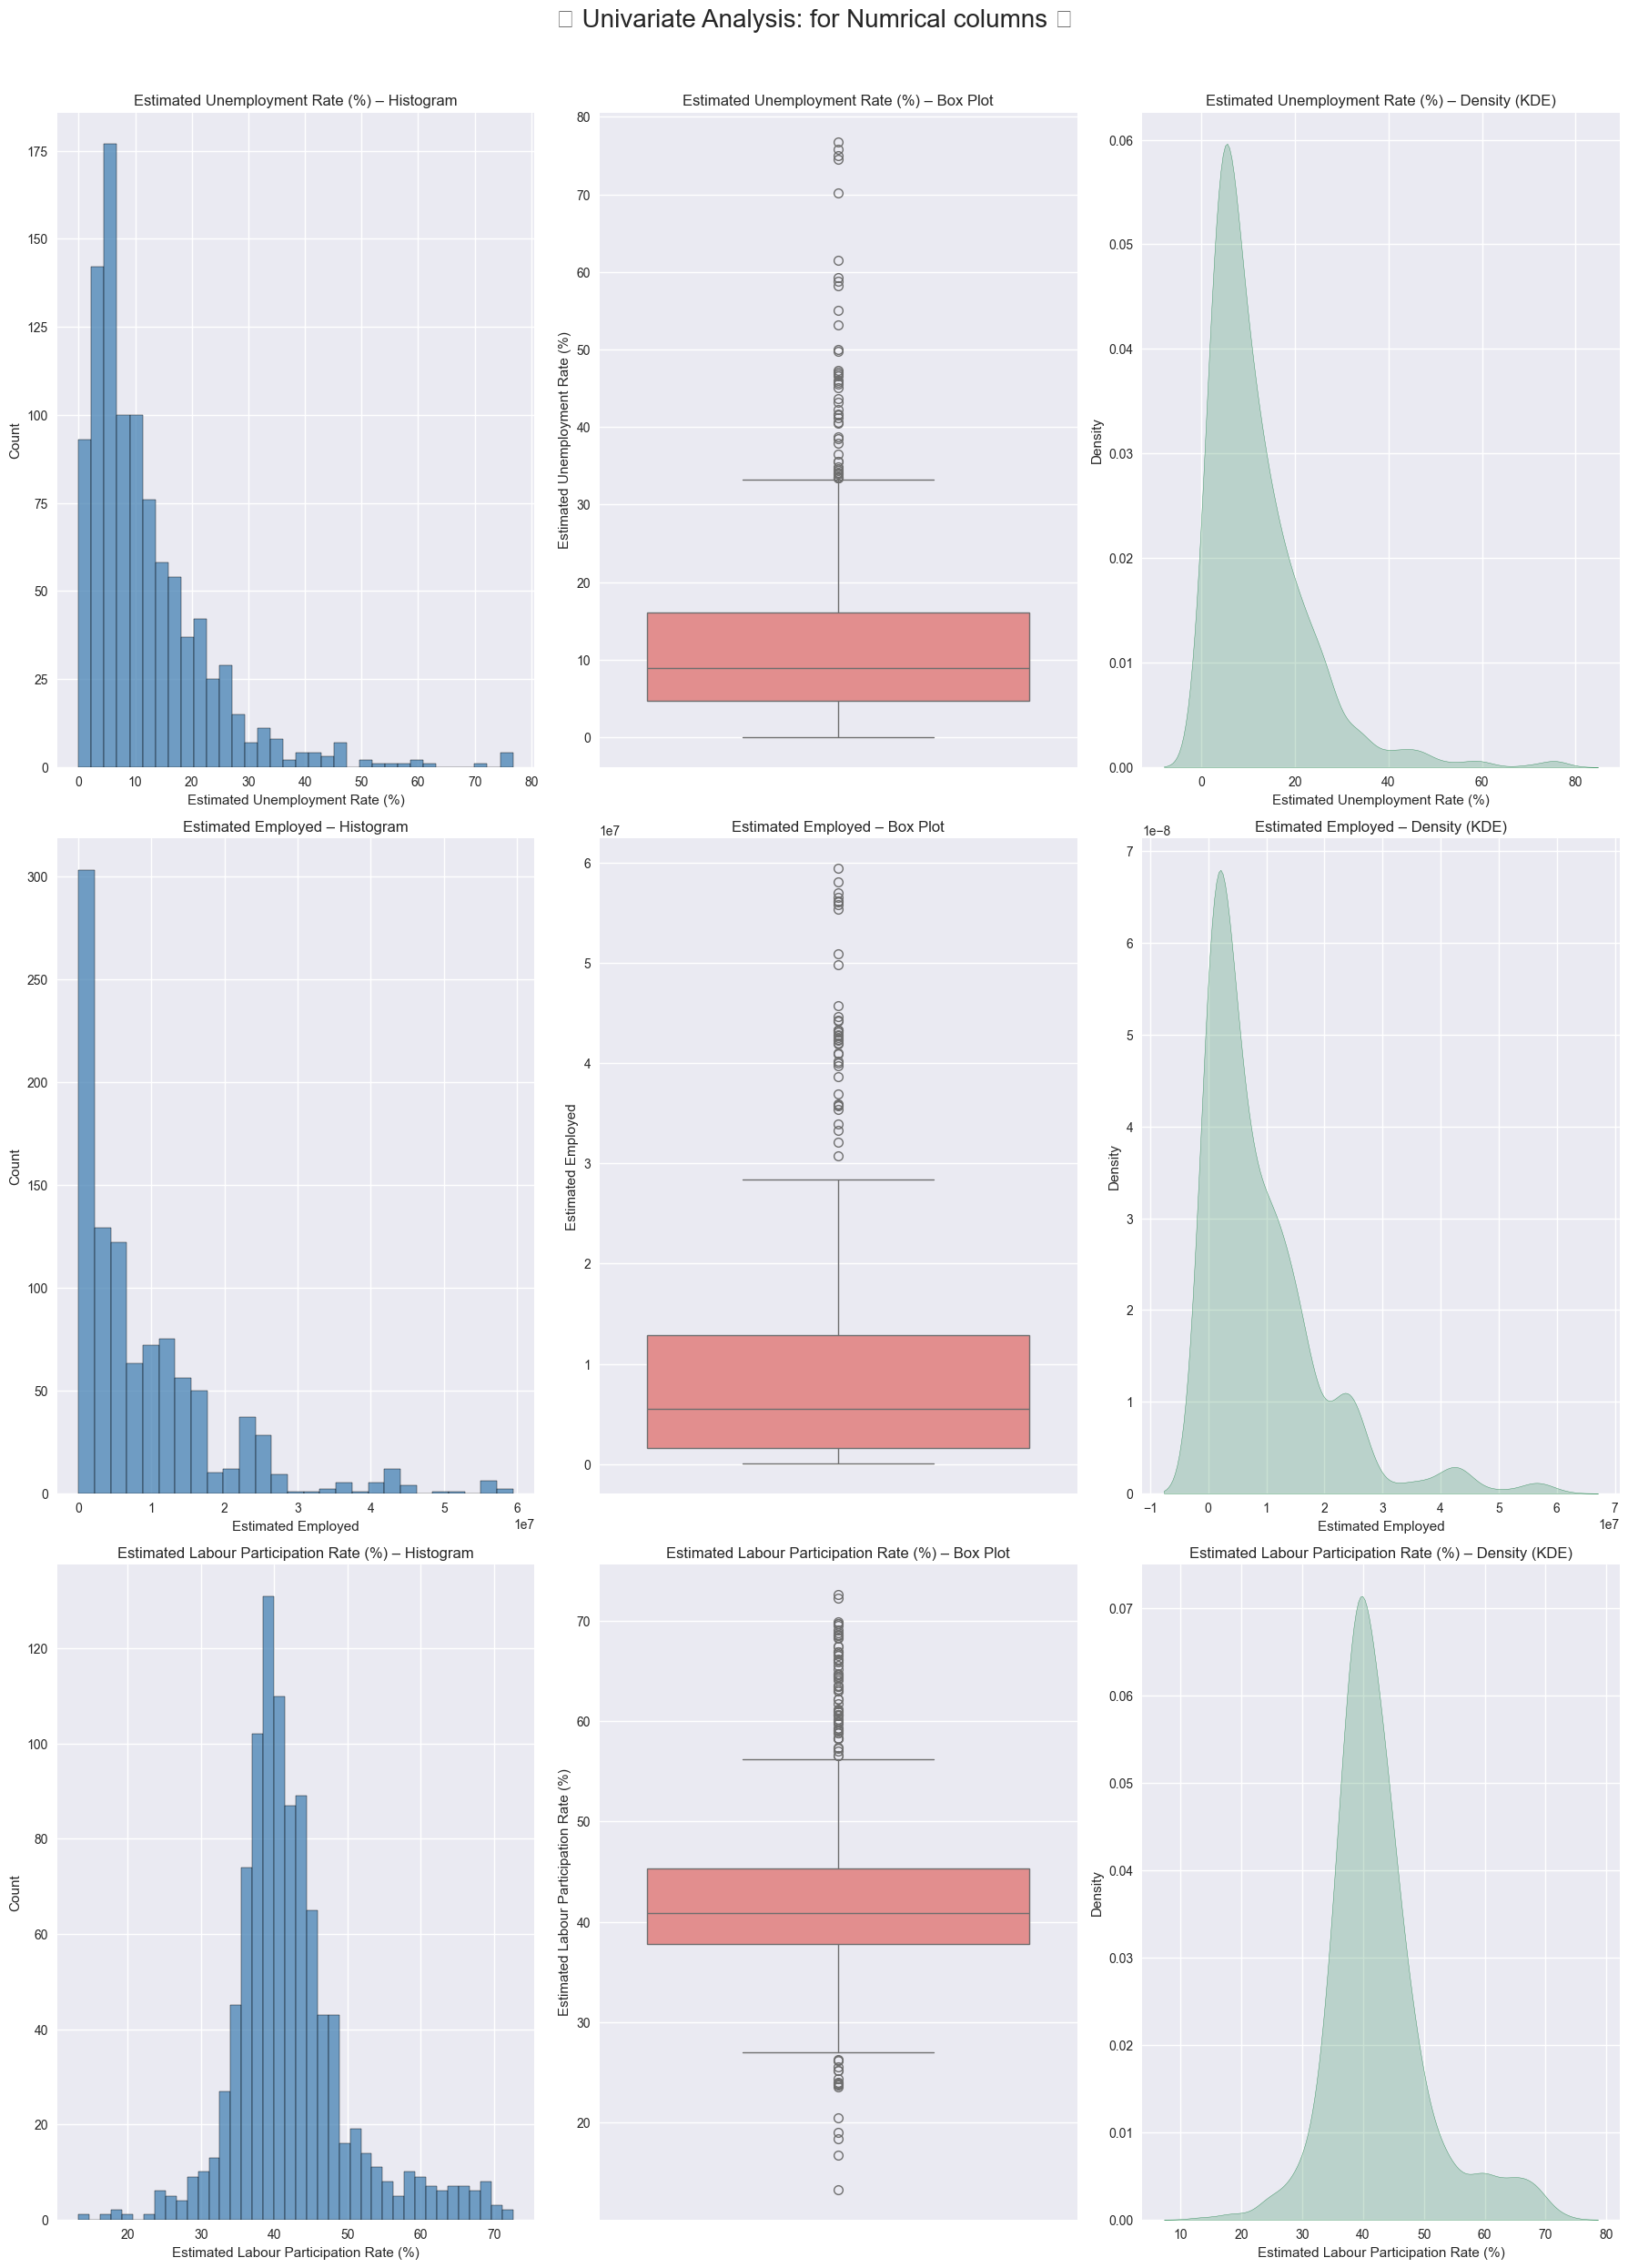

In [10]:
# create 12*3 subplot by plt
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 25))
fig.suptitle('🔢 Univariate Analysis: for Numrical columns 🔢', fontsize=20, y=0.995)

# make axes flaten for easy indexing
axes = axes.flatten()

plot_idx = 0

for col in numric:
    # 1. histogram
    sns.histplot(data=df, x=col, kde=False, ax=axes[plot_idx], color='steelblue')
    axes[plot_idx].set_title(f'{col} – Histogram')
    plot_idx += 1

    # 2. Boxplot
    sns.boxplot(data=df, y=col, ax=axes[plot_idx], color='lightcoral')
    axes[plot_idx].set_title(f'{col} – Box Plot')
    plot_idx += 1

    # 3. KDE (Density) Plot
    sns.kdeplot(data=df, x=col, ax=axes[plot_idx], fill=True, color='seagreen')
    axes[plot_idx].set_title(f'{col} – Density (KDE)')
    plot_idx += 1


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for suptitle
plt.show()

#### 🆎 Catigoric 

In [11]:
cats = df.select_dtypes(include='object').columns.tolist()
len(cats)

3

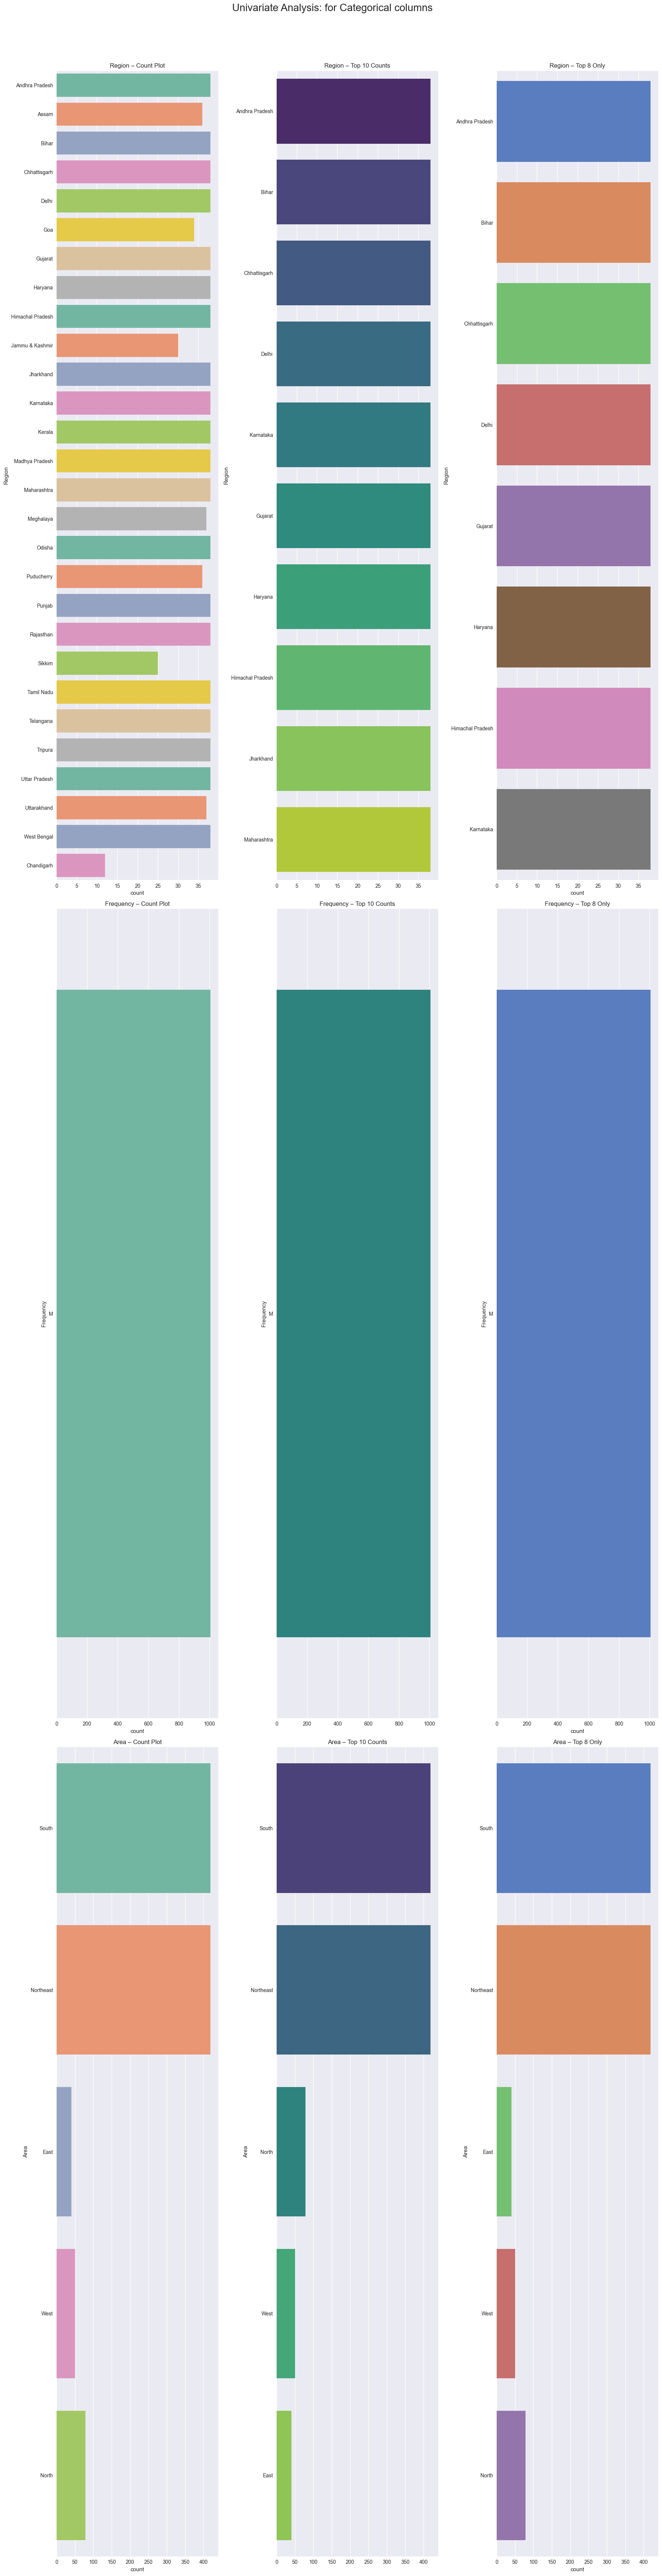

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 70))
fig.suptitle(' Univariate Analysis: for Categorical columns', fontsize=20, y=0.995)

# make axes flaten for easy indexing
axes = axes.flatten()

plot_idx = 0
for col in cats:
    # 1. Count plot (vertical bars)
    sns.countplot(data=df, y=col, ax=axes[plot_idx], palette='Set2')
    axes[plot_idx].set_title(f'{col} – Count Plot')
    plot_idx += 1

    # 2. Bar plot of top 10 categories (horizontal)
    top_cats = df[col].value_counts().head(10)
    sns.barplot(x=top_cats.values, y=top_cats.index, ax=axes[plot_idx], palette='viridis')
    axes[plot_idx].set_title(f'{col} – Top 10 Counts')
    plot_idx += 1

    # 3. Pie-like representation using donut (optional) – but since sns doesn't do pie,
    # we'll use a simple countplot with limited categories
    limited_data = df[df[col].isin(df[col].value_counts().head(8).index)]
    sns.countplot(data=limited_data, y=col, ax=axes[plot_idx], palette='muted')
    axes[plot_idx].set_title(f'{col} – Top 8 Only')
    plot_idx += 1


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for suptitle
plt.show()

## 🛠️ Data Preparation and Overview

### 🛠️ Features Engineering

In [13]:
# split date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [14]:
# create Approximate number of unemployed people
df['Estimated unemployment'] = df['Estimated Employed']*(df['Estimated Unemployment Rate (%)']/(100-df['Estimated Unemployment Rate (%)']))

# create Total active labor force
df['Estimated Labor Force'] = df['Estimated Employed'] + df['Estimated unemployment']

# create binary column if rate is high 
df['high_rate'] = df['Estimated Unemployment Rate (%)'].apply(lambda x: 1 if x > 15 else 0)

# create measure underutilization Employment vs Participation Gap
df['Emp vs Par Gap'] = df['Estimated Labour Participation Rate (%)']-((df['Estimated Employed']/df['Estimated Labor Force'])*100)

# Covid period flags 
df['Covid Period'] = df['Date'].apply(lambda date: "Pre-Covid" if date < pd.Timestamp('2020-03-01') else 'Post-Covid')

df['Lockdown period'] = df['Date'].apply(lambda x: 
    'Strict Lockdown' if pd.Timestamp('2020-04-01') <= x <= pd.Timestamp('2020-06-30') else
    'Moderate Lockdown' if pd.Timestamp('2020-07-01') <= x <= pd.Timestamp('2020-09-30') else
    'Pre-COVID' if x < pd.Timestamp('2020-03-01') else 'Unlocking Phase'
)

In [15]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month,Quarter,Estimated unemployment,Estimated Labor Force,high_rate,Emp vs Par Gap,Covid Period,Lockdown period
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,South,2019,5,2,454560.014011,1.245370e+07,0,-53.11,Pre-Covid,Pre-COVID
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,South,2019,6,2,369834.317174,1.212572e+07,0,-54.90,Pre-Covid,Pre-COVID
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,South,2019,7,3,470910.662338,1.255762e+07,0,-52.75,Pre-Covid,Pre-COVID
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,South,2019,8,3,421891.815887,1.270758e+07,0,-52.71,Pre-Covid,Pre-COVID
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,South,2019,9,3,668221.654962,1.292498e+07,0,-50.15,Pre-Covid,Pre-COVID


### 📊 Overview

In [18]:
print("Data Overview:")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Years: {df['Year'].unique()}")
print(f"Regions: {df['Area'].unique()}")
print(f"COVID Period: {df['Covid Period'].unique()}")
print(f"Lockdown Period: {df['Lockdown period'].unique()}")

Data Overview:
Date range: 2019-05-31 00:00:00 to 2020-10-31 00:00:00
Years: [2019 2020]
Regions: ['South' 'Northeast' 'East' 'West' 'North']
COVID Period: ['Pre-Covid' 'Post-Covid']
Lockdown Period: ['Pre-COVID' 'Unlocking Phase' 'Strict Lockdown' 'Moderate Lockdown']


## 🔶 Multivariate Analysis

### COVID Impact Analysis - Overall Trends

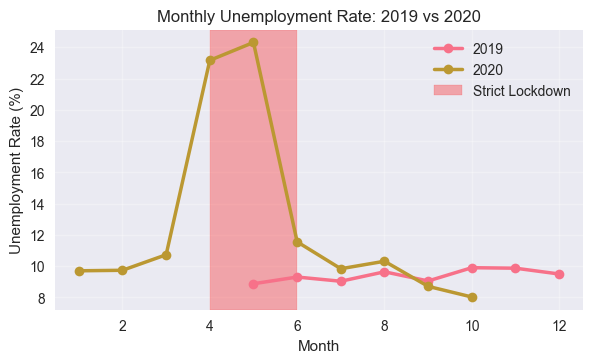

In [20]:
# lets start with monthly trends 
MonthlyTrends = df.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(15, 8))

# Plot 1: Monthly comparison 2019 vs 2020
plt.subplot(2, 2, 1)
for year in [2019, 2020]:
    year_data = MonthlyTrends[MonthlyTrends['Year'] == year]
    plt.plot(year_data['Month'], year_data['Estimated Unemployment Rate (%)'], 
             marker='o', label=f'{year}', linewidth=2.5)
plt.axvspan(4, 6, alpha=0.3, color='red', label='Strict Lockdown')
plt.title('Monthly Unemployment Rate: 2019 vs 2020')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

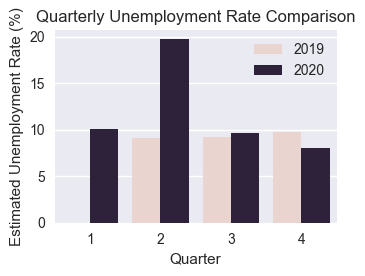

In [21]:
# now lets show Quartrly trends 
QuartrlyTrends = df.groupby(['Year', 'Quarter'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.subplot(2, 2, 2)
sns.barplot(data=QuartrlyTrends, x='Quarter', y='Estimated Unemployment Rate (%)', hue='Year')
plt.title('Quarterly Unemployment Rate Comparison')
plt.legend()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

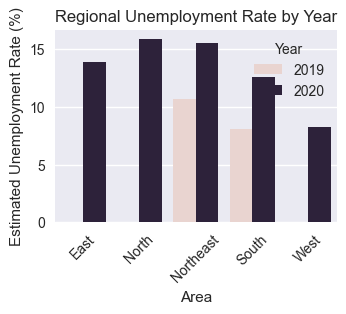

In [22]:
# lets show Area Impact
AreaImpact = df.groupby(['Area', 'Year'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.subplot(2, 2, 3)
sns.barplot(data=AreaImpact, x='Area', y='Estimated Unemployment Rate (%)', hue='Year')
plt.title('Regional Unemployment Rate by Year')
plt.xticks(rotation=45)

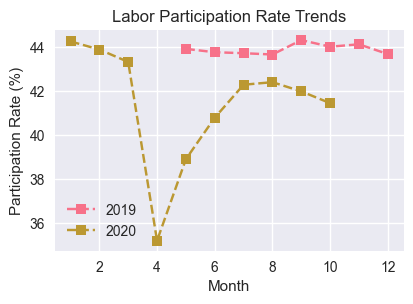

In [23]:
# Labor participation trends
plt.subplot(2, 2, 4)
participation_trends = df.groupby(['Year', 'Month'])['Estimated Labour Participation Rate (%)'].mean().reset_index()
for year in [2019, 2020]:
    year_data = participation_trends[participation_trends['Year'] == year]
    plt.plot(year_data['Month'], year_data['Estimated Labour Participation Rate (%)'], 
             marker='s', label=f'{year}', linestyle='--')
plt.title('Labor Participation Rate Trends')
plt.xlabel('Month')
plt.ylabel('Participation Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()

### Regional Deep Dive Analysis

In [24]:
# 1st: Calculate COVID impact metrics by region
RegionalAnalysis = df.groupby(['Area', 'Year']).agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean',
    'Estimated Employed': 'mean',
    'Region': 'count'  # Count of observations
}).reset_index()

In [27]:
# 2nd Pivot for comparison
RegionalPivot = RegionalAnalysis.pivot(index='Area', columns='Year', 
                                        values=['Estimated Unemployment Rate (%)', 
                                               'Estimated Labour Participation Rate (%)'])

In [28]:
# Calculate change
RegionalPivot[('Unemployment Change', 'Absolute')] = (
    RegionalPivot[('Estimated Unemployment Rate (%)', 2020)] - 
    RegionalPivot[('Estimated Unemployment Rate (%)', 2019)]
)
RegionalPivot[('Unemployment Change', 'Percent')] = (
    RegionalPivot[('Unemployment Change', 'Absolute')] / 
    RegionalPivot[('Estimated Unemployment Rate (%)', 2019)] * 100
)

print("Regional Impact Analysis:")
print(RegionalPivot.round(2))


Regional Impact Analysis:
          Estimated Unemployment Rate (%)         \
Year                                 2019   2020   
Area                                               
East                                  NaN  13.92   
North                                 NaN  15.89   
Northeast                           10.67  15.55   
South                                8.04  12.61   
West                                  NaN   8.24   

          Estimated Labour Participation Rate (%)        Unemployment Change  \
Year                                         2019   2020            Absolute   
Area                                                                           
East                                          NaN  40.11                 NaN   
North                                         NaN  38.70                 NaN   
Northeast                                   42.34  41.43                4.89   
South                                       45.54  42.26                4.57 

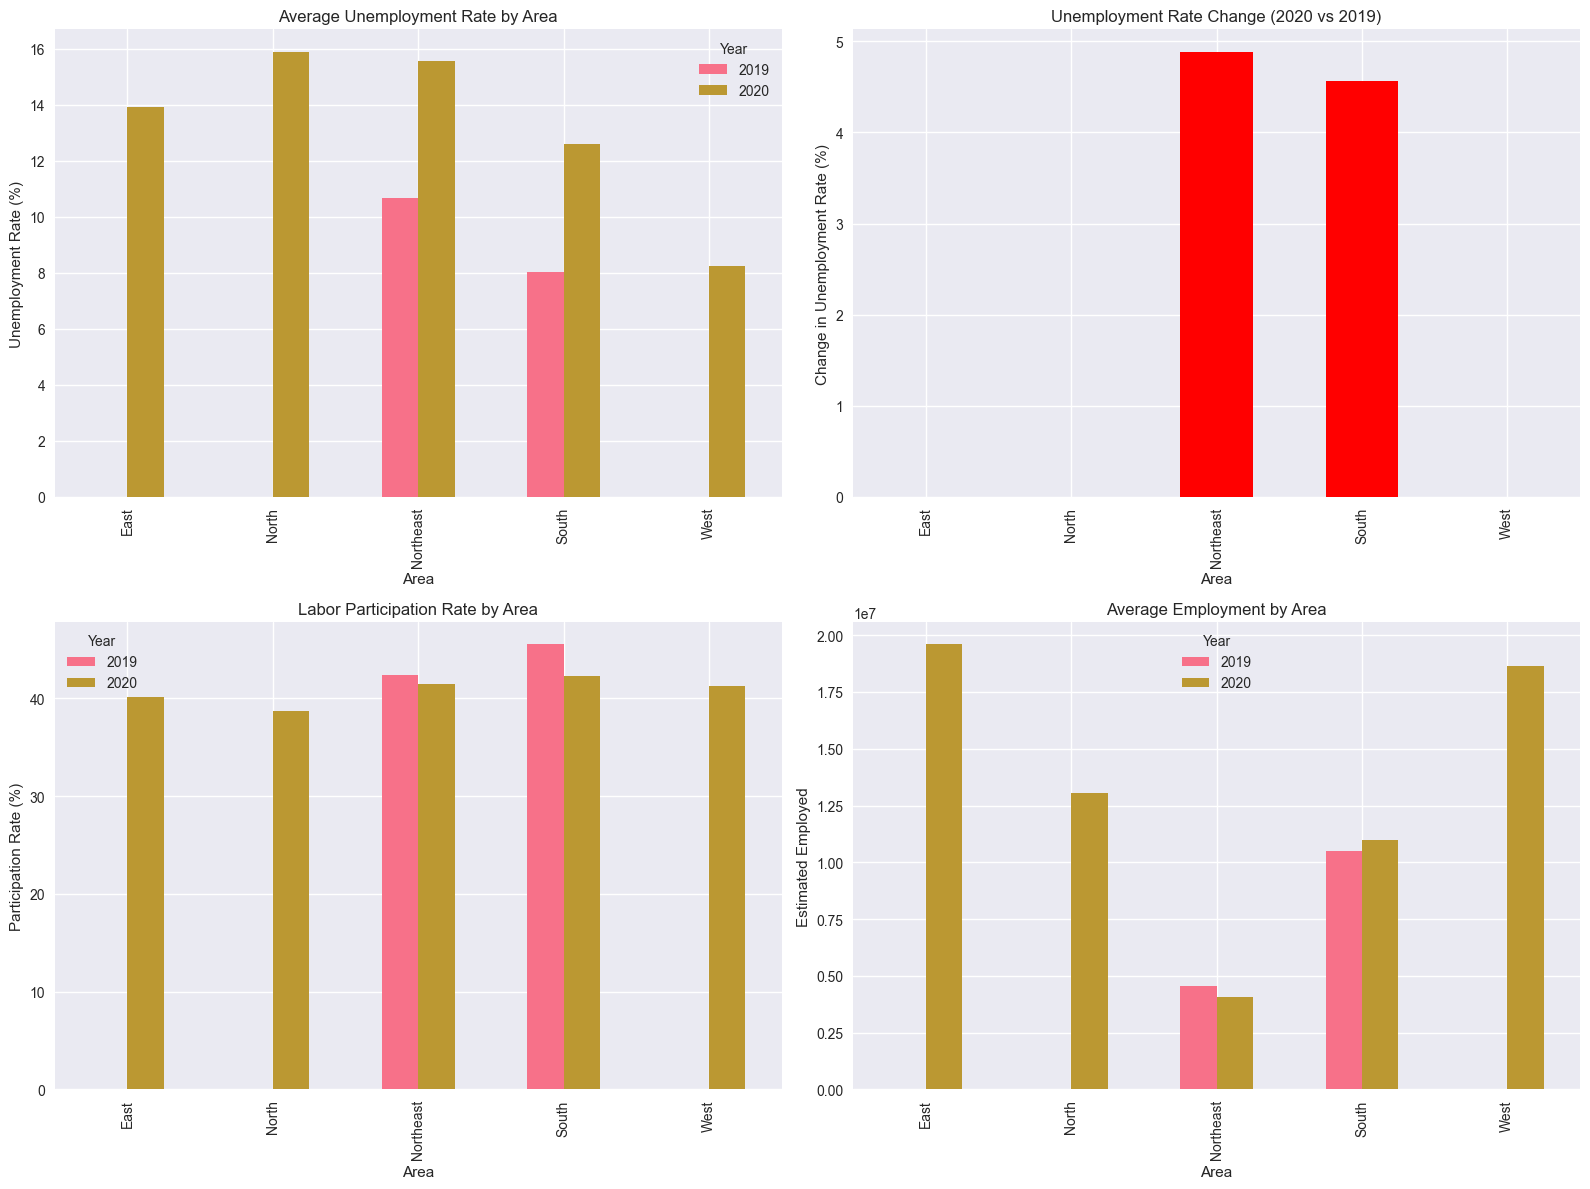

In [29]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Unemployment rate by region and year
regional_unemp = df.groupby(['Area', 'Year'])['Estimated Unemployment Rate (%)'].mean().unstack()
regional_unemp.plot(kind='bar', ax=axes[0,0], title='Average Unemployment Rate by Area')
axes[0,0].set_ylabel('Unemployment Rate (%)')

# Plot 2: Unemployment change
RegionalPivot[('Unemployment Change', 'Absolute')].plot(kind='bar', ax=axes[0,1], 
                                                        color=['red' if x > 0 else 'green' for x in RegionalPivot[('Unemployment Change', 'Absolute')]],
                                                        title='Unemployment Rate Change (2020 vs 2019)')
axes[0,1].set_ylabel('Change in Unemployment Rate (%)')

# Plot 3: Labor participation by region
regional_part = df.groupby(['Area', 'Year'])['Estimated Labour Participation Rate (%)'].mean().unstack()
regional_part.plot(kind='bar', ax=axes[1,0], title='Labor Participation Rate by Area')
axes[1,0].set_ylabel('Participation Rate (%)')

# Plot 4: Employment trends
regional_emp = df.groupby(['Area', 'Year'])['Estimated Employed'].mean().unstack()
regional_emp.plot(kind='bar', ax=axes[1,1], title='Average Employment by Area')
axes[1,1].set_ylabel('Estimated Employed')

plt.tight_layout()
plt.show()

### State-Level Impact Ranking

Top 10 Most Affected States:
Region
Puducherry        19.19
Tamil Nadu        12.06
Jharkhand         10.49
Bihar              8.95
Haryana            6.56
Karnataka          6.39
Telangana          5.85
Delhi              5.61
Andhra Pradesh     5.12
Kerala             4.86
Name: (Unemployment_Change, Absolute), dtype: float64

Top 10 Least Affected States:
Region
Himachal Pradesh   -2.03
Tripura            -1.52
Assam              -0.74
Jammu & Kashmir     0.22
Chandigarh          0.51
Meghalaya           0.94
Goa                 1.47
Uttar Pradesh       1.59
Punjab              1.96
Chhattisgarh        2.62
Name: (Unemployment_Change, Absolute), dtype: float64


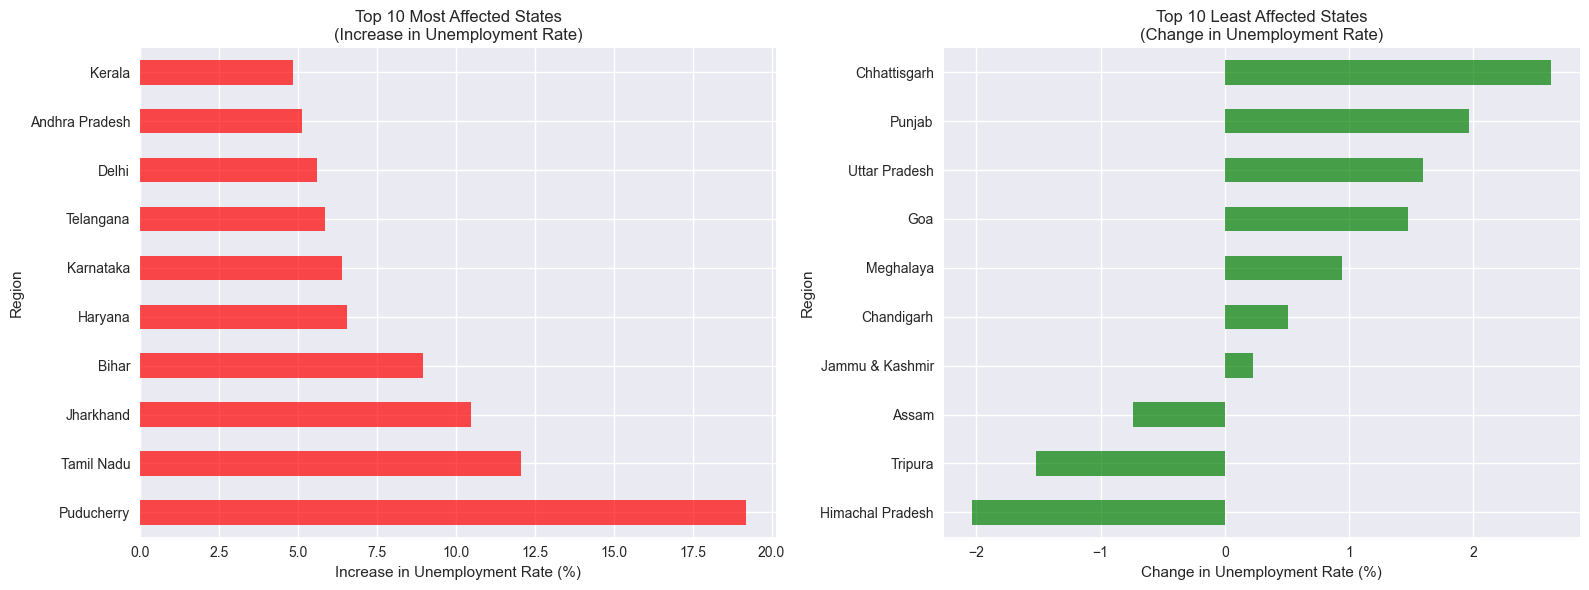

In [30]:
# Calculate state-level impact
state_impact = df.groupby(['Region', 'Year']).agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean',
    'Estimated Employed': 'mean'
}).reset_index()

# Calculate changes
state_pivot = state_impact.pivot(index='Region', columns='Year', 
                                values=['Estimated Unemployment Rate (%)', 
                                       'Estimated Labour Participation Rate (%)',
                                       'Estimated Employed'])

state_pivot[('Unemployment_Change', 'Absolute')] = (
    state_pivot[('Estimated Unemployment Rate (%)', 2020)] - 
    state_pivot[('Estimated Unemployment Rate (%)', 2019)]
)

# Rank states by impact
most_affected = state_pivot[('Unemployment_Change', 'Absolute')].sort_values(ascending=False).head(10)
least_affected = state_pivot[('Unemployment_Change', 'Absolute')].sort_values(ascending=True).head(10)

print("Top 10 Most Affected States:")
print(most_affected.round(2))
print("\nTop 10 Least Affected States:")
print(least_affected.round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

most_affected.plot(kind='barh', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Top 10 Most Affected States\n(Increase in Unemployment Rate)')
axes[0].set_xlabel('Increase in Unemployment Rate (%)')

least_affected.plot(kind='barh', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Top 10 Least Affected States\n(Change in Unemployment Rate)')
axes[1].set_xlabel('Change in Unemployment Rate (%)')

plt.tight_layout()
plt.show()

### Lockdown Period Analysis

Lockdown Period Impact (April-June):
           2019_Same_Period  2020_Lockdown  Increase  Increase_Percent
Area                                                                  
East                    NaN          26.56       NaN               NaN
North                   NaN          18.50       NaN               NaN
Northeast             10.44          20.83     10.39             99.55
South                  7.63          19.12     11.49            150.50
West                    NaN          12.87       NaN               NaN


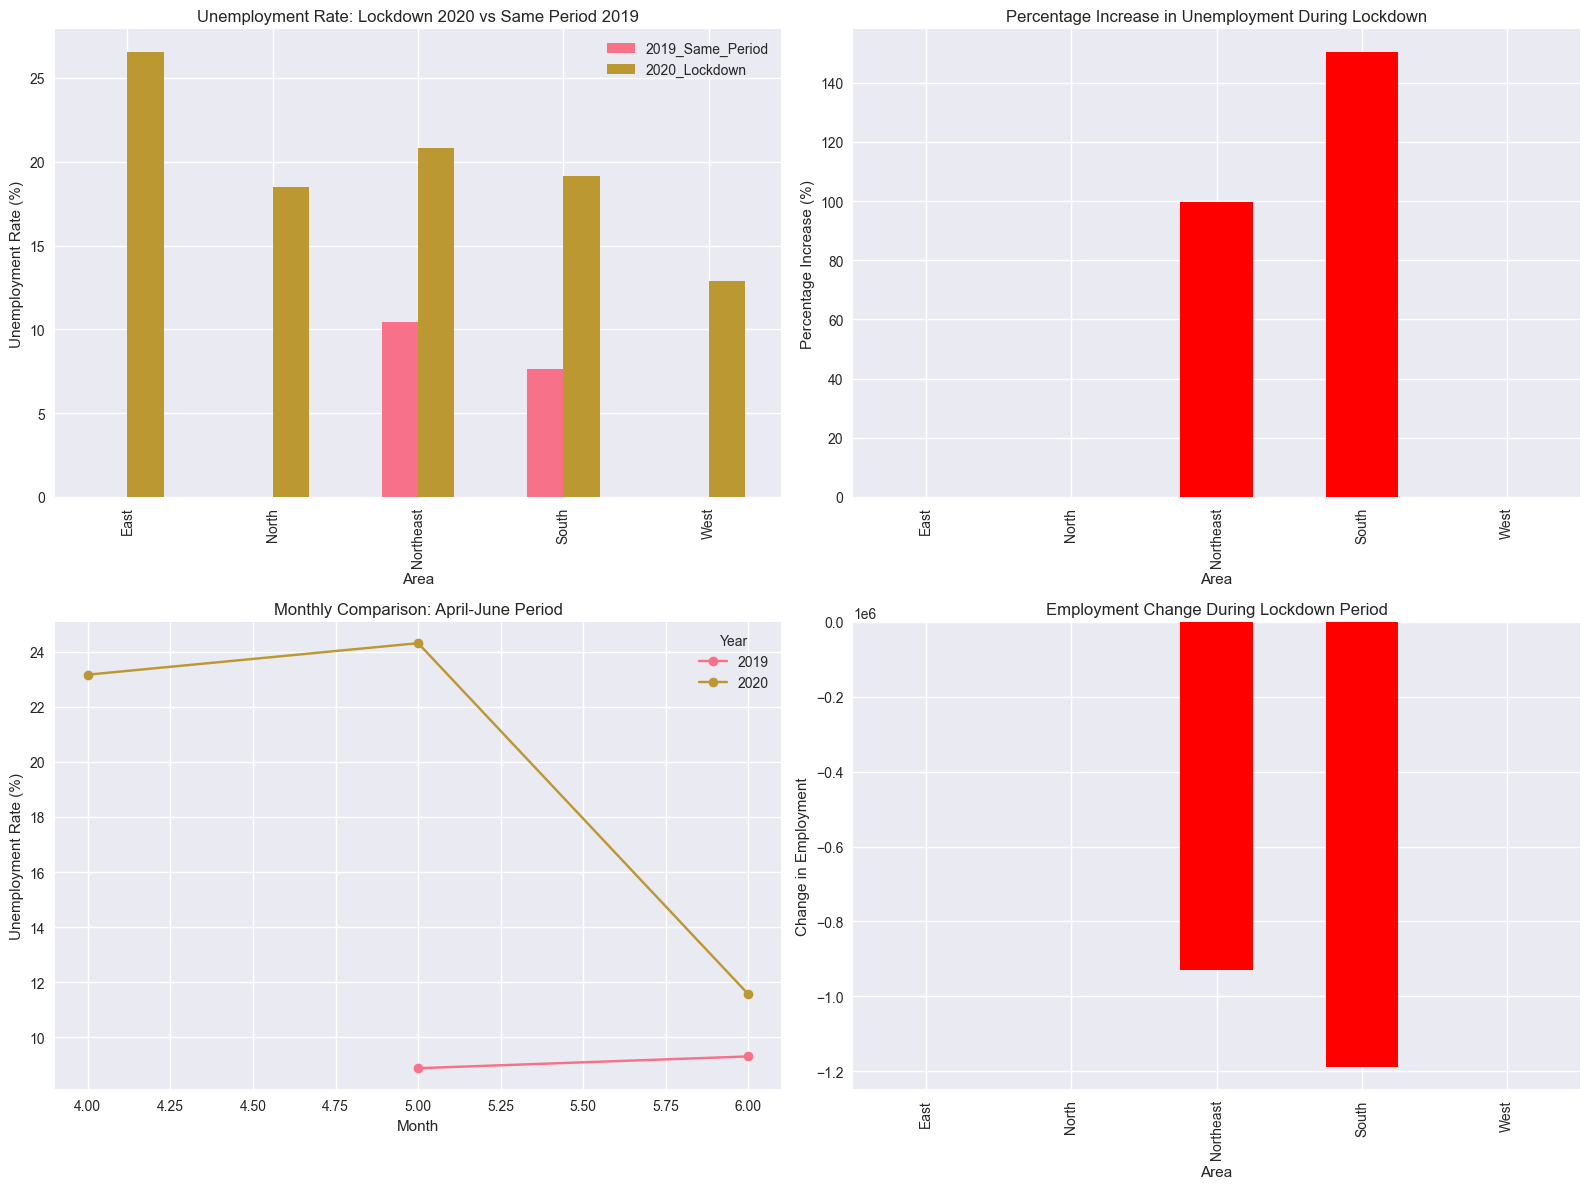

In [31]:
# Analyze strict lockdown period (April-June 2020) vs same period 2019
lockdown_months = [4, 5, 6]  # April, May, June

lockdown_2020 = df[(df['Year'] == 2020) & (df['Month'].isin(lockdown_months))]
same_period_2019 = df[(df['Year'] == 2019) & (df['Month'].isin(lockdown_months))]

# Comparison metrics
lockdown_comparison = pd.DataFrame({
    '2019_Same_Period': same_period_2019.groupby('Area')['Estimated Unemployment Rate (%)'].mean(),
    '2020_Lockdown': lockdown_2020.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
})

lockdown_comparison['Increase'] = lockdown_comparison['2020_Lockdown'] - lockdown_comparison['2019_Same_Period']
lockdown_comparison['Increase_Percent'] = (lockdown_comparison['Increase'] / lockdown_comparison['2019_Same_Period']) * 100

print("Lockdown Period Impact (April-June):")
print(lockdown_comparison.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Regional comparison during lockdown
lockdown_comparison[['2019_Same_Period', '2020_Lockdown']].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Unemployment Rate: Lockdown 2020 vs Same Period 2019')
axes[0,0].set_ylabel('Unemployment Rate (%)')

# Plot 2: Percentage increase
lockdown_comparison['Increase_Percent'].plot(kind='bar', ax=axes[0,1], 
                                            color=['red' if x > 0 else 'green' for x in lockdown_comparison['Increase_Percent']])
axes[0,1].set_title('Percentage Increase in Unemployment During Lockdown')
axes[0,1].set_ylabel('Percentage Increase (%)')

# Plot 3: Monthly breakdown during lockdown
lockdown_monthly = df[df['Month'].isin([4,5,6])].groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().unstack(0)
lockdown_monthly.plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Monthly Comparison: April-June Period')
axes[1,0].set_ylabel('Unemployment Rate (%)')

# Plot 4: Employment change during lockdown
employment_lockdown = df[df['Month'].isin([4,5,6])].groupby(['Year', 'Area'])['Estimated Employed'].mean().unstack(0)
employment_lockdown['Change'] = employment_lockdown[2020] - employment_lockdown[2019]
employment_lockdown['Change'].plot(kind='bar', ax=axes[1,1], 
                                  color=['red' if x < 0 else 'green' for x in employment_lockdown['Change']])
axes[1,1].set_title('Employment Change During Lockdown Period')
axes[1,1].set_ylabel('Change in Employment')

plt.tight_layout()
plt.show()

### Recovery Analysis

Recovery Analysis (Return to Pre-COVID levels):
           Pre_COVID  Unlocking_Phase  Recovery_Gap  Recovery_Percent
Area                                                                 
East            7.53             9.68          2.15             28.55
North          14.62            14.92          0.30              2.03
Northeast      11.66            11.22         -0.44             -3.74
South           7.53             7.98          0.45              5.96
West            6.00             5.69         -0.31             -5.15


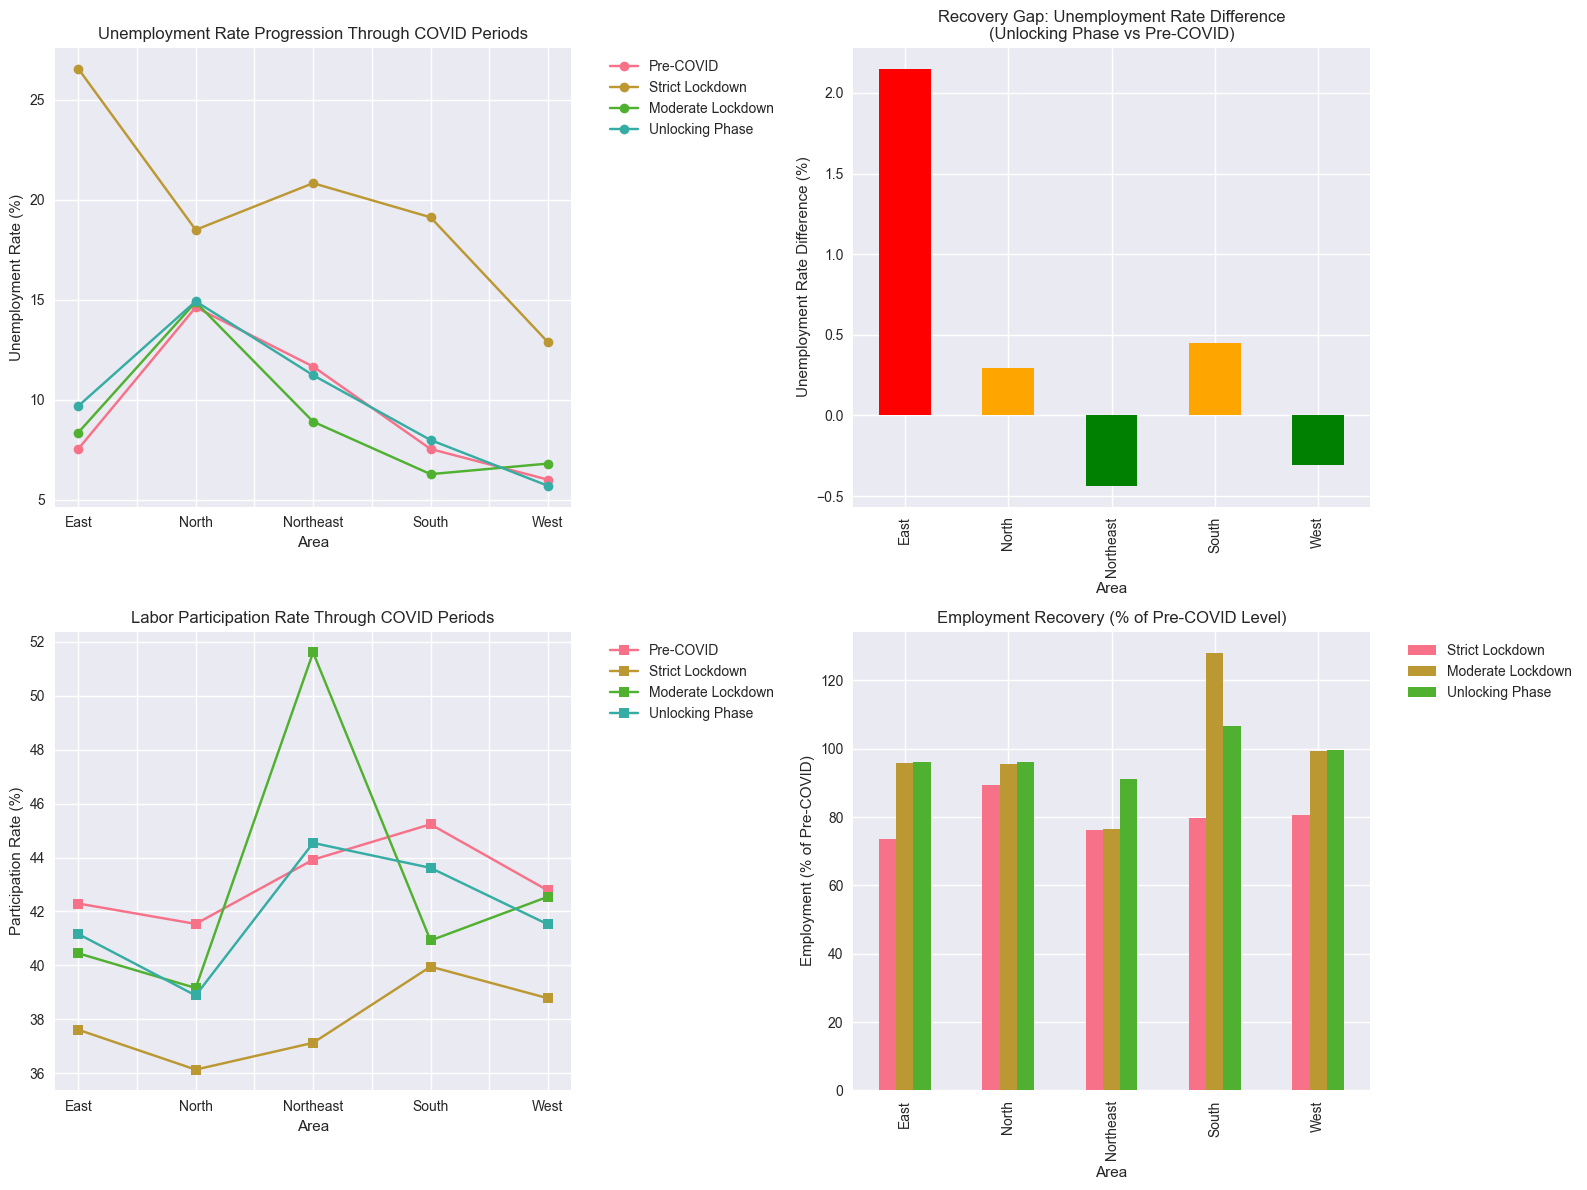

In [32]:
# Analyze recovery patterns after strict lockdown
recovery_data = df[df['Year'] == 2020].copy()
recovery_data['period'] = recovery_data['Month'].apply(lambda x: 
    'Pre-COVID' if x < 3 else
    'Strict Lockdown' if x in [4,5,6] else
    'Moderate Lockdown' if x in [7,8,9] else
    'Unlocking Phase'
)

recovery_trends = recovery_data.groupby(['Area', 'period']).agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean',
    'Estimated Employed': 'mean'
}).reset_index()

# Calculate recovery metrics
pre_covid_baseline = recovery_data[recovery_data['period'] == 'Pre-COVID'].groupby('Area')['Estimated Unemployment Rate (%)'].mean()
unlocking_phase = recovery_data[recovery_data['period'] == 'Unlocking Phase'].groupby('Area')['Estimated Unemployment Rate (%)'].mean()

recovery_metrics = pd.DataFrame({
    'Pre_COVID': pre_covid_baseline,
    'Unlocking_Phase': unlocking_phase
})
recovery_metrics['Recovery_Gap'] = recovery_metrics['Unlocking_Phase'] - recovery_metrics['Pre_COVID']
recovery_metrics['Recovery_Percent'] = (recovery_metrics['Recovery_Gap'] / recovery_metrics['Pre_COVID']) * 100

print("Recovery Analysis (Return to Pre-COVID levels):")
print(recovery_metrics.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Recovery progression by region
recovery_pivot = recovery_trends.pivot(index='period', columns='Area', values='Estimated Unemployment Rate (%)')
recovery_pivot = recovery_pivot.reindex(['Pre-COVID', 'Strict Lockdown', 'Moderate Lockdown', 'Unlocking Phase'])
recovery_pivot.T.plot(kind='line', marker='o', ax=axes[0,0])
axes[0,0].set_title('Unemployment Rate Progression Through COVID Periods')
axes[0,0].set_ylabel('Unemployment Rate (%)')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Recovery gap
recovery_metrics['Recovery_Gap'].plot(kind='bar', ax=axes[0,1],
                                     color=['green' if x <= 0 else 'orange' if x <= 2 else 'red' for x in recovery_metrics['Recovery_Gap']])
axes[0,1].set_title('Recovery Gap: Unemployment Rate Difference\n(Unlocking Phase vs Pre-COVID)')
axes[0,1].set_ylabel('Unemployment Rate Difference (%)')

# Plot 3: Labor participation recovery
participation_recovery = recovery_trends.pivot(index='period', columns='Area', values='Estimated Labour Participation Rate (%)')
participation_recovery = participation_recovery.reindex(['Pre-COVID', 'Strict Lockdown', 'Moderate Lockdown', 'Unlocking Phase'])
participation_recovery.T.plot(kind='line', marker='s', ax=axes[1,0])
axes[1,0].set_title('Labor Participation Rate Through COVID Periods')
axes[1,0].set_ylabel('Participation Rate (%)')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Employment recovery
employment_recovery = recovery_data.groupby(['Area', 'period'])['Estimated Employed'].mean().unstack()
employment_recovery = employment_recovery[['Pre-COVID', 'Strict Lockdown', 'Moderate Lockdown', 'Unlocking Phase']]
employment_recovery_pct = employment_recovery.div(employment_recovery['Pre-COVID'], axis=0) * 100
employment_recovery_pct.drop('Pre-COVID', axis=1).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Employment Recovery (% of Pre-COVID Level)')
axes[1,1].set_ylabel('Employment (% of Pre-COVID)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Correlation & Factor Analysis

Correlation with Unemployment Increase:
Unemployment_Increase                      1.000000
Estimated Employed                         0.107899
Estimated Labour Participation Rate (%)   -0.270235
Name: Unemployment_Increase, dtype: float64


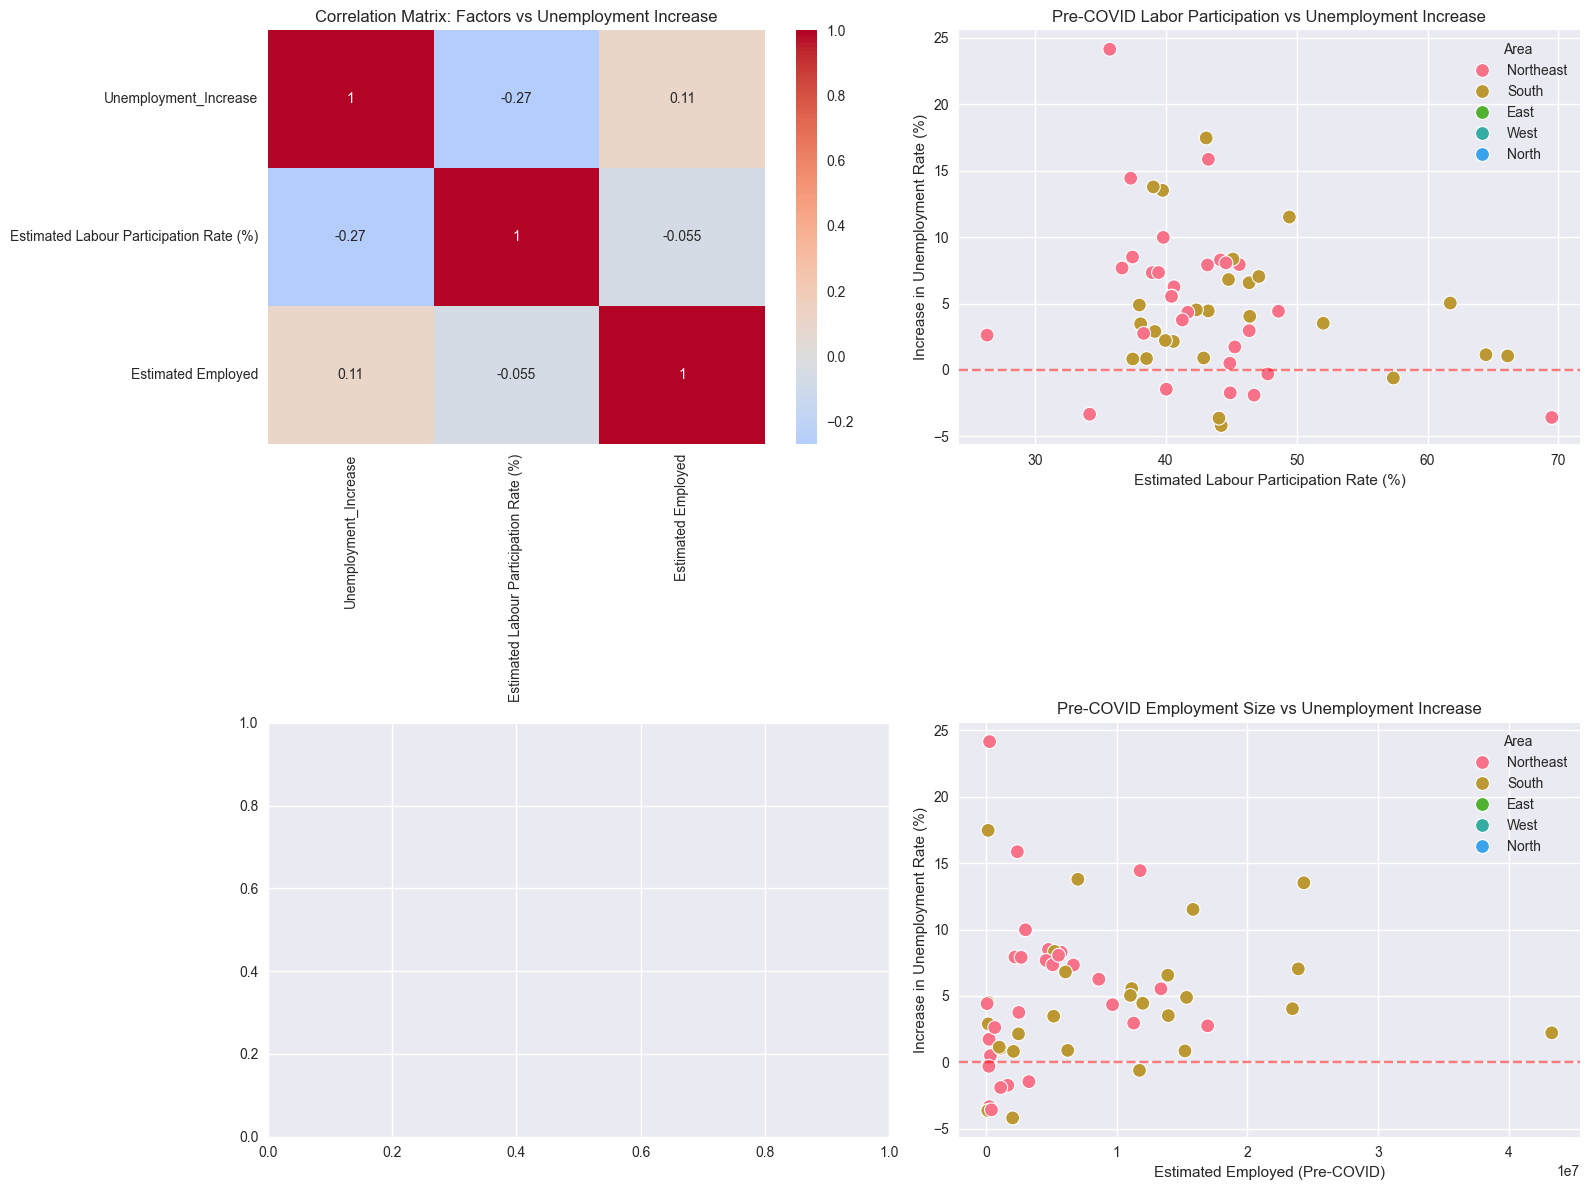

In [34]:
# Analyze what factors correlate with COVID impact
covid_impact_factors = df.groupby(['Region', 'Area']).agg({
    'Estimated Unemployment Rate (%)': lambda x: x[df['Year'] == 2020].mean() - x[df['Year'] == 2019].mean(),
    'Estimated Labour Participation Rate (%)': 'first',  # Use 2019 value as baseline
    'Estimated Employed': 'first'
}).reset_index()

covid_impact_factors.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment_Increase'}, inplace=True)

# Calculate correlation matrix
correlation_matrix = covid_impact_factors[['Unemployment_Increase', 
                                         'Estimated Labour Participation Rate (%)',
                                         'Estimated Employed']].corr()

print("Correlation with Unemployment Increase:")
print(correlation_matrix['Unemployment_Increase'].sort_values(ascending=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Correlation Matrix: Factors vs Unemployment Increase')

# Plot 2: Labor participation vs unemployment impact
sns.scatterplot(data=covid_impact_factors, x='Estimated Labour Participation Rate (%)', 
                y='Unemployment_Increase', hue='Area', s=100, ax=axes[0,1])
axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0,1].set_title('Pre-COVID Labor Participation vs Unemployment Increase')
axes[0,1].set_ylabel('Increase in Unemployment Rate (%)')



# Plot 3: Employment size vs impact
sns.scatterplot(data=covid_impact_factors, x='Estimated Employed', y='Unemployment_Increase', 
                hue='Area', s=100, ax=axes[1,1])
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,1].set_title('Pre-COVID Employment Size vs Unemployment Increase')
axes[1,1].set_xlabel('Estimated Employed (Pre-COVID)')
axes[1,1].set_ylabel('Increase in Unemployment Rate (%)')

plt.tight_layout()
plt.show()

### Statistical Significance Testing

In [37]:
print("STATISTICAL SIGNIFICANCE TESTING")
print("="*50)

# Test 1: Overall difference between 2019 and 2020
unemp_2019 = df[df['Year'] == 2019]['Estimated Unemployment Rate (%)']
unemp_2020 = df[df['Year'] == 2020]['Estimated Unemployment Rate (%)']

t_stat, p_value = stats.ttest_ind(unemp_2019, unemp_2020)
print(f"T-test: 2019 vs 2020 Unemployment Rates")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"Significant difference: {'YES' if p_value < 0.05 else 'NO'}")
print()

# Test 2: Regional differences in impact
regions = df['Area'].unique()
print("Regional Impact Significance:")
for region in regions:
    region_2019 = df[(df['Year'] == 2019) & (df['Area'] == region)]['Estimated Unemployment Rate (%)']
    region_2020 = df[(df['Year'] == 2020) & (df['Area'] == region)]['Estimated Unemployment Rate (%)']
    t_stat, p_value = stats.ttest_ind(region_2019, region_2020)
    mean_increase = region_2020.mean() - region_2019.mean()
    print(f"{region:15} - Increase: {mean_increase:6.2f}%, P-value: {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''}")

print()
# Test 3: Lockdown period vs same period 2019
lockdown_2020_rates = df[(df['Year'] == 2020) & (df['Month'].isin([4,5,6]))]['Estimated Unemployment Rate (%)']
lockdown_2019_rates = df[(df['Year'] == 2019) & (df['Month'].isin([4,5,6]))]['Estimated Unemployment Rate (%)']

t_stat, p_value = stats.ttest_ind(lockdown_2019_rates, lockdown_2020_rates)
print(f"Lockdown Period (Apr-Jun) vs Same Period 2019:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"Significant difference: {'YES' if p_value < 0.05 else 'NO'}")

STATISTICAL SIGNIFICANCE TESTING
T-test: 2019 vs 2020 Unemployment Rates
T-statistic: -6.5282, P-value: 0.0000
Significant difference: YES

Regional Impact Significance:
South           - Increase:   4.57%, P-value: 0.0000 ***
Northeast       - Increase:   4.89%, P-value: 0.0000 ***
East            - Increase:    nan%, P-value: nan 
West            - Increase:    nan%, P-value: nan 
North           - Increase:    nan%, P-value: nan 

Lockdown Period (Apr-Jun) vs Same Period 2019:
T-statistic: -6.7392, P-value: 0.0000
Significant difference: YES


### Policy Recommendations & Business Insights

In [41]:
# Insight 1: Most vulnerable regions
most_vulnerable = covid_impact_factors.nlargest(5, 'Unemployment_Increase')
print("1. MOST VULNERABLE REGIONS (Highest unemployment increase):")
for idx, row in most_vulnerable.iterrows():
    print(f"   - {row['Region']}: +{row['Unemployment_Increase']:.2f}% increase")

# Insight 2: Most resilient regions
most_resilient = covid_impact_factors.nsmallest(5, 'Unemployment_Increase')
print("\n2. MOST RESILIENT REGIONS (Lowest unemployment increase):")
for idx, row in most_resilient.iterrows():
    change = row['Unemployment_Increase']
    status = "DECREASE" if change < 0 else "minimal increase"
    print(f"   - {row['Region']}: {change:+.2f}% ({status})")

# Insight 3: Recovery patterns
print("\n3. RECOVERY PATTERNS:")
for region in recovery_metrics.index:
    gap = recovery_metrics.loc[region, 'Recovery_Gap']
    if gap <= 0:
        print(f"   - {region}: FULL RECOVERY (Below pre-COVID levels)")
    elif gap <= 1:
        print(f"   - {region}: NEAR RECOVERY ({gap:.2f}% above pre-COVID)")
    elif gap <= 3:
        print(f"   - {region}: MODERATE RECOVERY ({gap:.2f}% above pre-COVID)")
    else:
        print(f"   - {region}: SLOW RECOVERY ({gap:.2f}% above pre-COVID)")

# Insight 4: Policy recommendations
print("\n4. POLICY RECOMMENDATIONS:")
print("   - TARGETED SUPPORT for regions with >5% unemployment increase")
print("   - STUDY RESILIENT REGIONS to replicate successful strategies")
print("   - FOCUS ON LABOR PARTICIPATION recovery in most affected areas")
print("   - REGION-SPECIFIC stimulus packages based on impact severity")
print("   - LONG-TERM MONITORING of recovery in slowly-recovering regions")

1. MOST VULNERABLE REGIONS (Highest unemployment increase):
   - Puducherry: +24.15% increase
   - Puducherry: +17.47% increase
   - Jharkhand: +15.86% increase
   - Tamil Nadu: +14.44% increase
   - Jharkhand: +13.78% increase

2. MOST RESILIENT REGIONS (Lowest unemployment increase):
   - Himachal Pradesh: -4.18% (DECREASE)
   - Sikkim: -3.63% (DECREASE)
   - Tripura: -3.58% (DECREASE)
   - Goa: -3.33% (DECREASE)
   - Jammu & Kashmir: -1.89% (DECREASE)

3. RECOVERY PATTERNS:
   - East: MODERATE RECOVERY (2.15% above pre-COVID)
   - North: NEAR RECOVERY (0.30% above pre-COVID)
   - Northeast: FULL RECOVERY (Below pre-COVID levels)
   - South: NEAR RECOVERY (0.45% above pre-COVID)
   - West: FULL RECOVERY (Below pre-COVID levels)

4. POLICY RECOMMENDATIONS:
   - TARGETED SUPPORT for regions with >5% unemployment increase
   - STUDY RESILIENT REGIONS to replicate successful strategies
   - FOCUS ON LABOR PARTICIPATION recovery in most affected areas
   - REGION-SPECIFIC stimulus package

### Executive Summary Dashboard

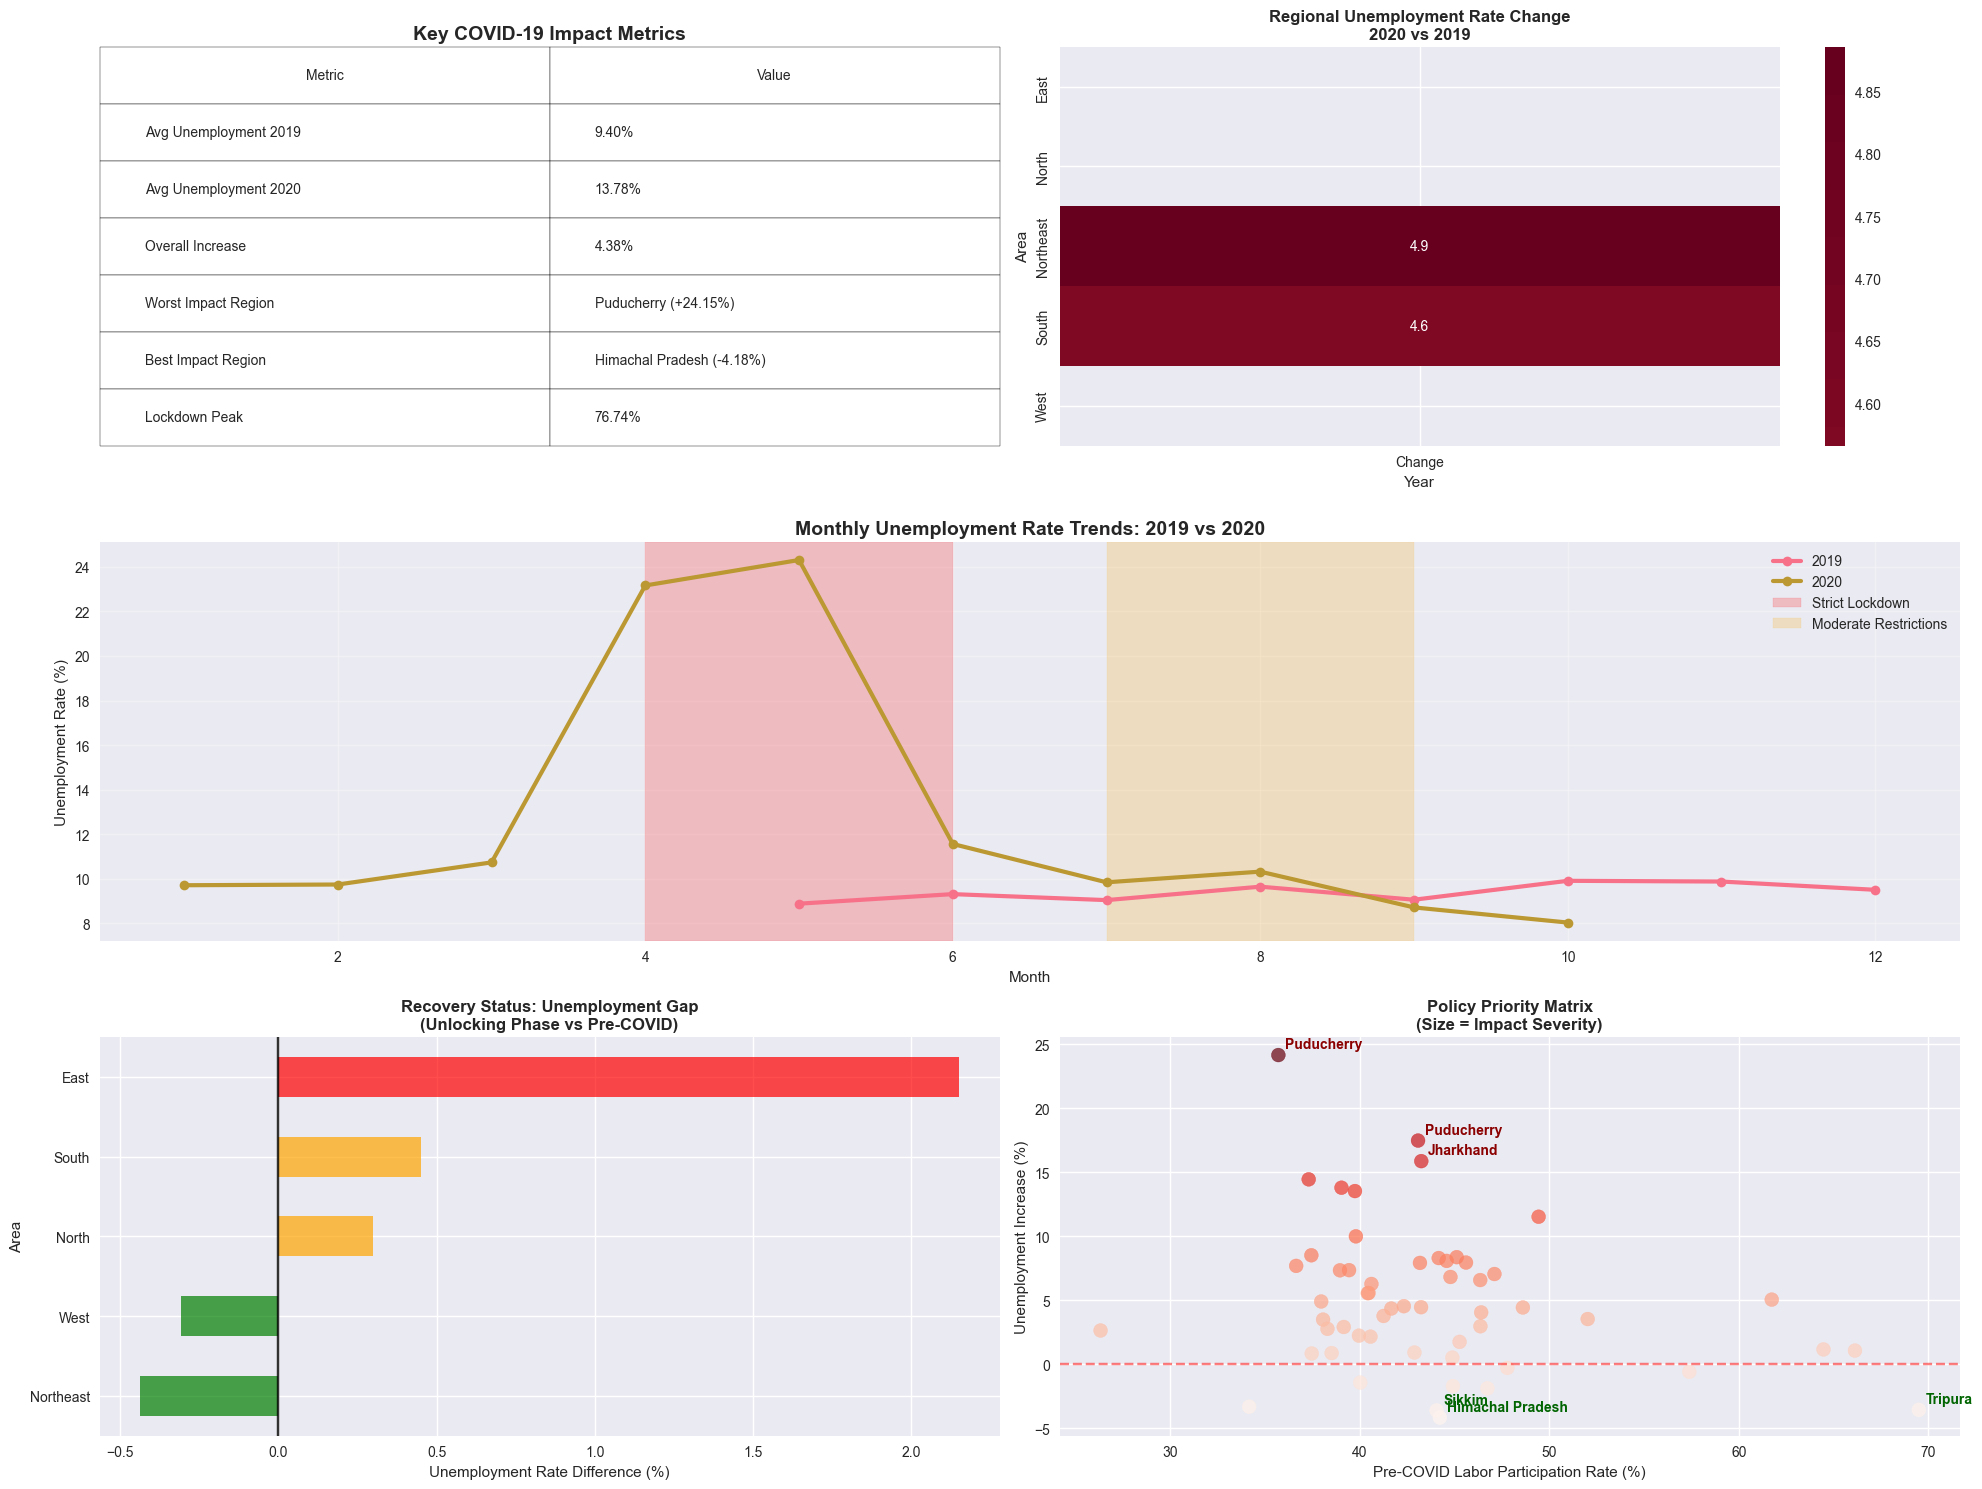

In [42]:
# Create a comprehensive summary dashboard
fig = plt.figure(figsize=(20, 15))

# Overall metrics
total_increase = unemp_2020.mean() - unemp_2019.mean()
worst_region = most_vulnerable.iloc[0]
best_region = most_resilient.iloc[0]

# Plot 1: Key metrics summary
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2)
metrics_summary = pd.DataFrame({
    'Metric': ['Avg Unemployment 2019', 'Avg Unemployment 2020', 'Overall Increase', 
               'Worst Impact Region', 'Best Impact Region', 'Lockdown Peak'],
    'Value': [f"{unemp_2019.mean():.2f}%", f"{unemp_2020.mean():.2f}%", f"{total_increase:.2f}%",
              f"{worst_region['Region']} (+{worst_region['Unemployment_Increase']:.2f}%)",
              f"{best_region['Region']} ({best_region['Unemployment_Increase']:+.2f}%)",
              f"{lockdown_2020_rates.max():.2f}%"]
})
ax1.axis('tight')
ax1.axis('off')
table = ax1.table(cellText=metrics_summary.values, colLabels=metrics_summary.columns, 
                  cellLoc='left', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax1.set_title('Key COVID-19 Impact Metrics', fontsize=14, fontweight='bold')

# Plot 2: Regional impact heatmap
ax2 = plt.subplot2grid((3, 4), (0, 2), colspan=2)
regional_impact_pivot = df.pivot_table(values='Estimated Unemployment Rate (%)', 
                                      index='Area', columns='Year', aggfunc='mean')
regional_impact_pivot['Change'] = regional_impact_pivot[2020] - regional_impact_pivot[2019]
sns.heatmap(regional_impact_pivot[['Change']], annot=True, cmap='RdBu_r', center=0, ax=ax2)
ax2.set_title('Regional Unemployment Rate Change\n2020 vs 2019', fontweight='bold')

# Plot 3: Monthly trends comparison
ax3 = plt.subplot2grid((3, 4), (1, 0), colspan=4)
monthly_comparison = df.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().unstack(0)
monthly_comparison.plot(ax=ax3, linewidth=3, marker='o')
ax3.axvspan(4, 6, alpha=0.2, color='red', label='Strict Lockdown')
ax3.axvspan(7, 9, alpha=0.2, color='orange', label='Moderate Restrictions')
ax3.set_title('Monthly Unemployment Rate Trends: 2019 vs 2020', fontweight='bold', fontsize=14)
ax3.set_ylabel('Unemployment Rate (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Recovery status
ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=2)
recovery_status = recovery_metrics['Recovery_Gap'].sort_values()
colors = ['green' if x <= 0 else 'orange' if x <= 2 else 'red' for x in recovery_status]
recovery_status.plot(kind='barh', ax=ax4, color=colors, alpha=0.7)
ax4.axvline(x=0, color='black', linestyle='-', alpha=0.8)
ax4.set_title('Recovery Status: Unemployment Gap\n(Unlocking Phase vs Pre-COVID)', fontweight='bold')
ax4.set_xlabel('Unemployment Rate Difference (%)')

# Plot 5: Policy priority matrix
ax5 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
scatter = ax5.scatter(covid_impact_factors['Estimated Labour Participation Rate (%)'], 
                     covid_impact_factors['Unemployment_Increase'], 
                     s=100, alpha=0.7, c=covid_impact_factors['Unemployment_Increase'], cmap='Reds')
ax5.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax5.set_xlabel('Pre-COVID Labor Participation Rate (%)')
ax5.set_ylabel('Unemployment Increase (%)')
ax5.set_title('Policy Priority Matrix\n(Size = Impact Severity)', fontweight='bold')

# Add region labels for top/bottom performers
for idx, row in covid_impact_factors.nlargest(3, 'Unemployment_Increase').iterrows():
    ax5.annotate(row['Region'], (row['Estimated Labour Participation Rate (%)'], row['Unemployment_Increase']),
                xytext=(5, 5), textcoords='offset points', fontweight='bold', color='darkred')

for idx, row in covid_impact_factors.nsmallest(3, 'Unemployment_Increase').iterrows():
    ax5.annotate(row['Region'], (row['Estimated Labour Participation Rate (%)'], row['Unemployment_Increase']),
                xytext=(5, 5), textcoords='offset points', fontweight='bold', color='darkgreen')

plt.tight_layout()
plt.show()